<a href="https://colab.research.google.com/github/srirapunandini/dav---5400/blob/main/images_gcl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [3]:
import os
import sys
import subprocess

# Define the script path (if needed) and required packages
scripts_path = r"C:\Users\nandi\AppData\Roaming\Python\Python311\Scripts"
required_packages = ["duckduckgo_search>=6.2", "fastai", "python-lsp-black"]

# Add the Scripts path to sys.path if not already included
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Install required packages
try:
    for package in required_packages:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", package])
    print("All packages installed successfully.")
except Exception as e:
    print(f"An error occurred during installation: {e}")

# Test if duckduckgo_search can be imported
try:
    from duckduckgo_search import DDGS
    print("DuckDuckGo Search module loaded successfully!")
except ModuleNotFoundError as e:
    print(f"Error: {e}. Ensure the package is installed correctly.")


All packages installed successfully.
DuckDuckGo Search module loaded successfully!


In [4]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [9]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('duck photos', max_images=1)
urls[0]

'https://upload.wikimedia.org/wikipedia/commons/5/5c/Pair_of_white_domesticated_ducks.jpg'

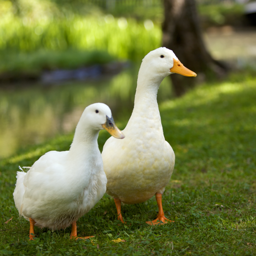

In [10]:
from fastdownload import download_url
dest = 'duck.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

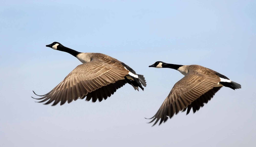

In [16]:
download_url(search_images('goose photos', max_images=1)[0], 'goose.jpg', show_progress=False)
Image.open('goose.jpg').to_thumb(256,256)

In [17]:
searches = 'goose','duck'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

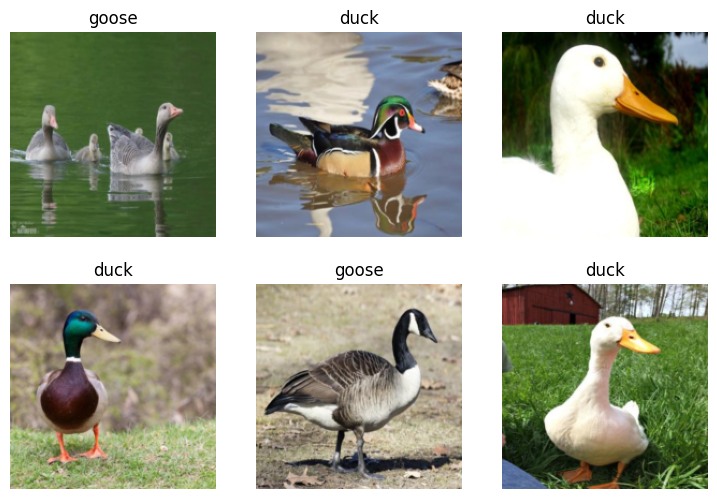

In [19]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [20]:
blocks=(ImageBlock, CategoryBlock),


In [21]:
get_items=get_image_files,

In [22]:
splitter=RandomSplitter(valid_pct=0.2, seed=42),

In [23]:
get_y=parent_label,

In [24]:
item_tfms=[Resize(192, method='squish')]

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 58.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.865221,0.231203,0.092308,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.298550,0.231124,0.092308,01:02
1,0.184056,0.185846,0.076923,00:58
2,0.147615,0.180208,0.092308,01:00


In [26]:
is_duck,_,probs = learn.predict(PILImage.create('duck.jpg'))
print(f"This is a: {is_duck}.")
print(f"Probability it's a duck: {probs[0]:.4f}")

This is a: duck.
Probability it's a duck: 0.9959
